# ABS Monthly Household Spending Indicator 5682

## Python set-up

In [1]:
# analytic imports
import pandas as pd
import readabs as ra
from readabs import metacol as mc

# local imports
from abs_helper import get_abs_data
from plotting import seas_trend_plot

# display charts in this notebook
SHOW = True

In [2]:
abs_dict, meta, source, RECENT = get_abs_data("5682.0")
plot_times = None, RECENT
plot_tags = "", "-recent"
print(meta[mc.table].unique())

['5682001' '5682002' '5682003' '5682004' '5682005' '5682006' '5682007'
 '5682008' '5682009' '5682010']


## Plotting

### Headline charts

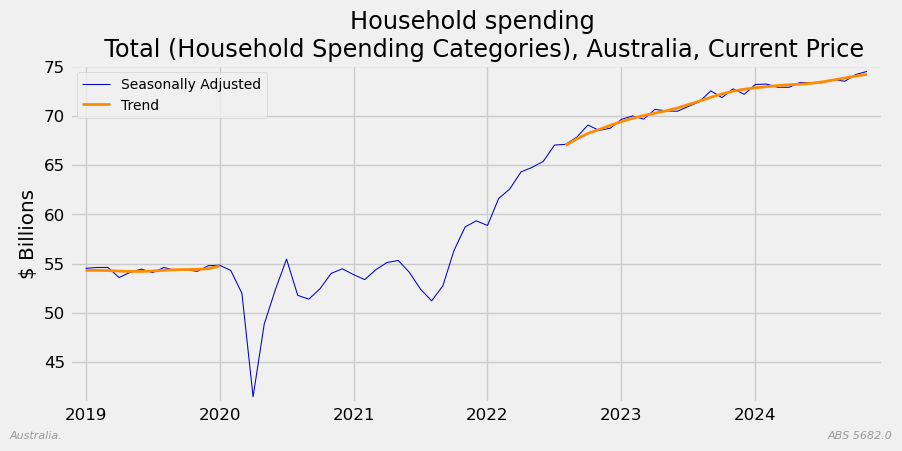

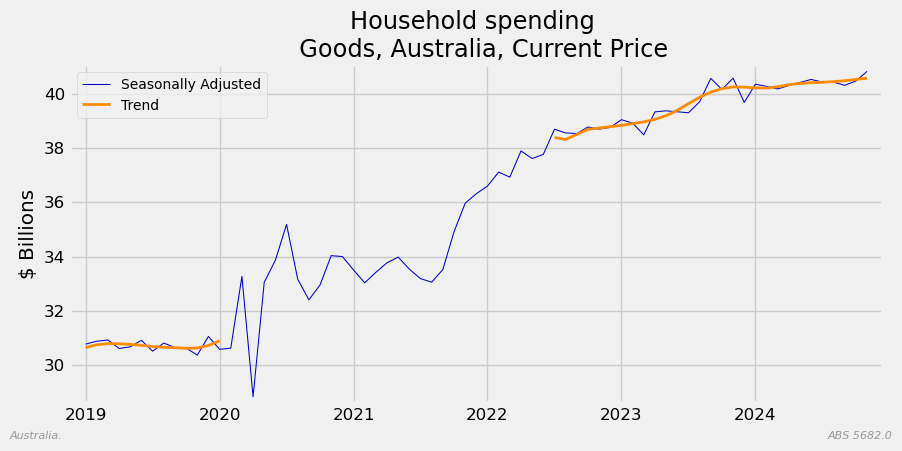

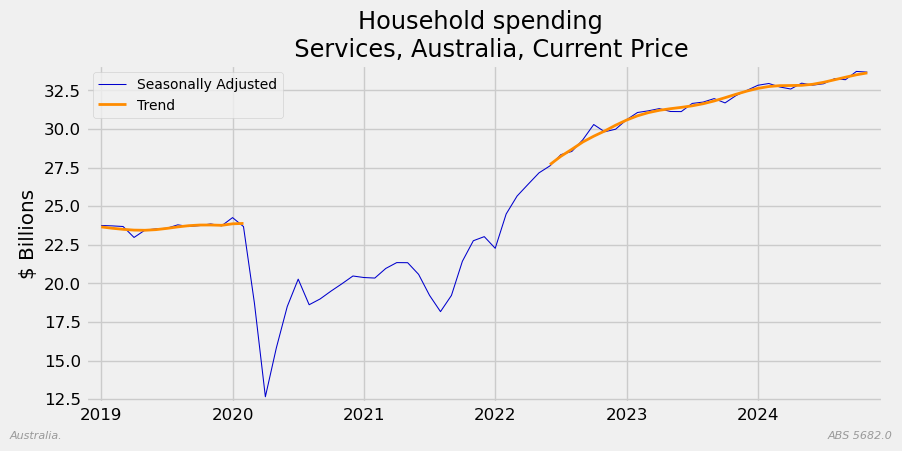

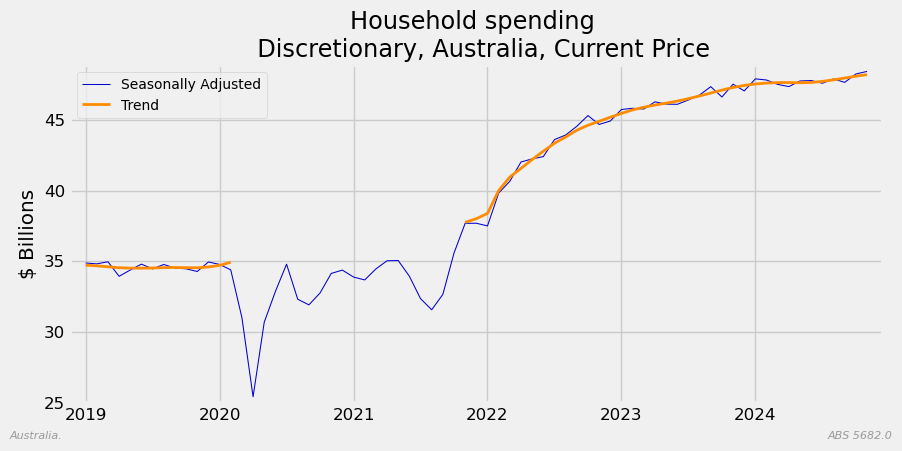

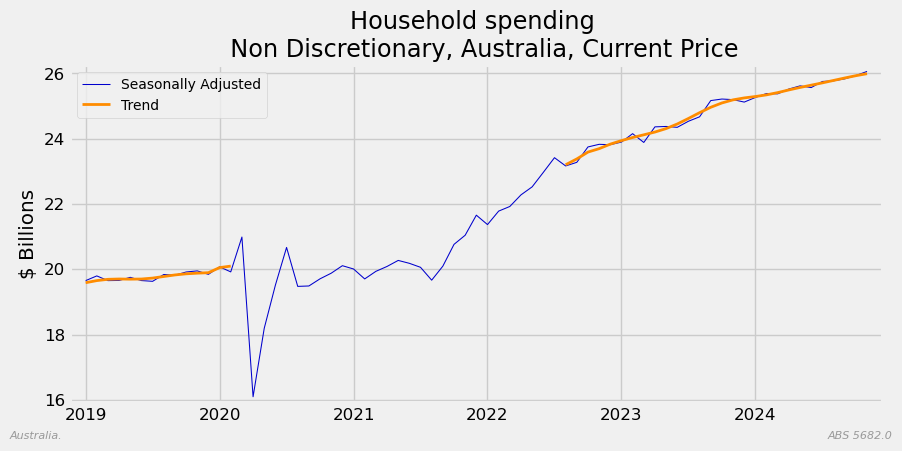

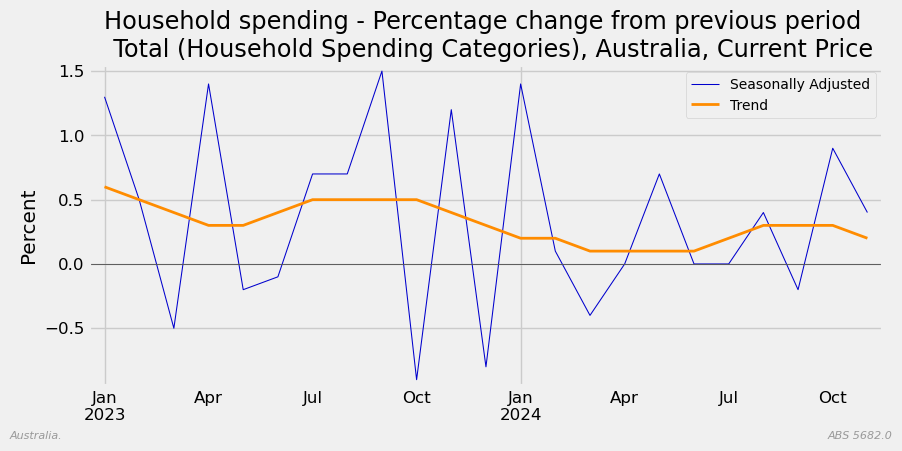

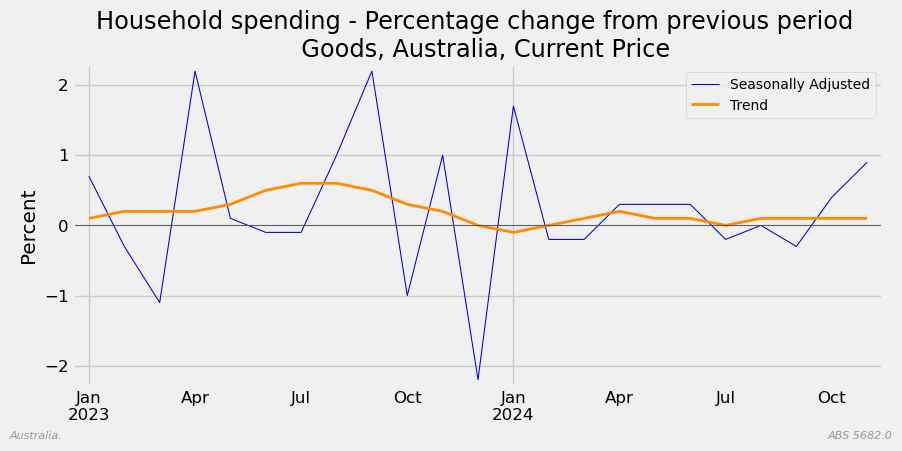

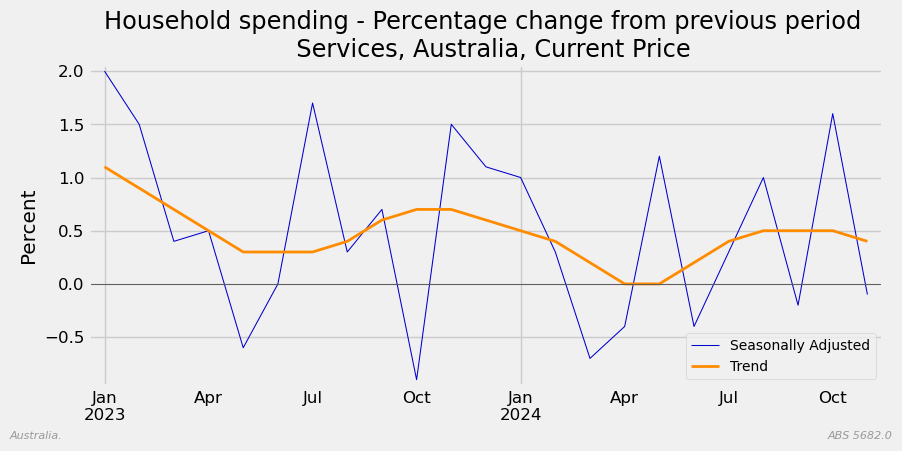

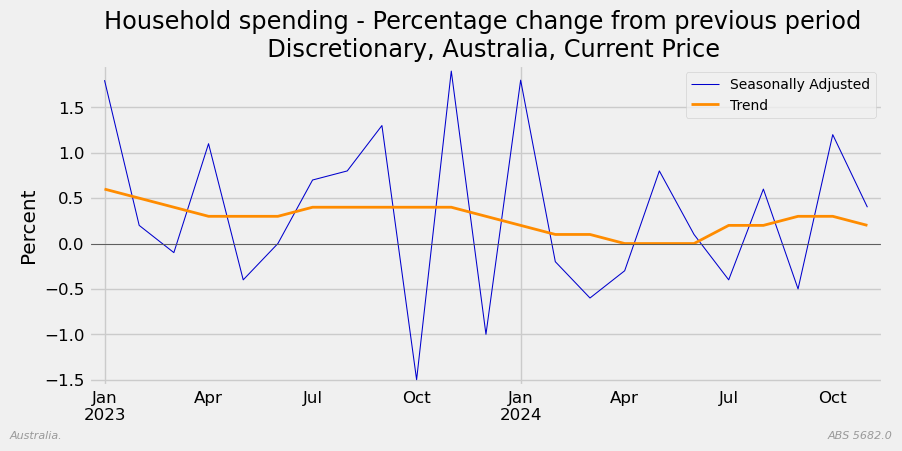

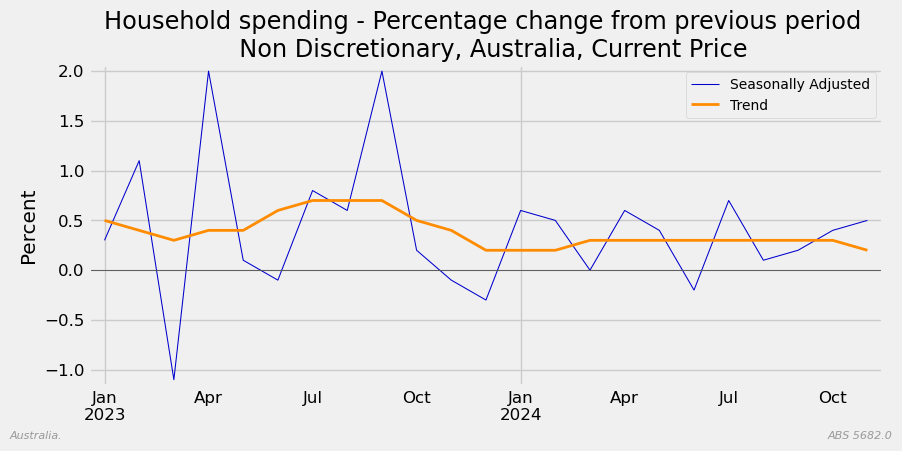

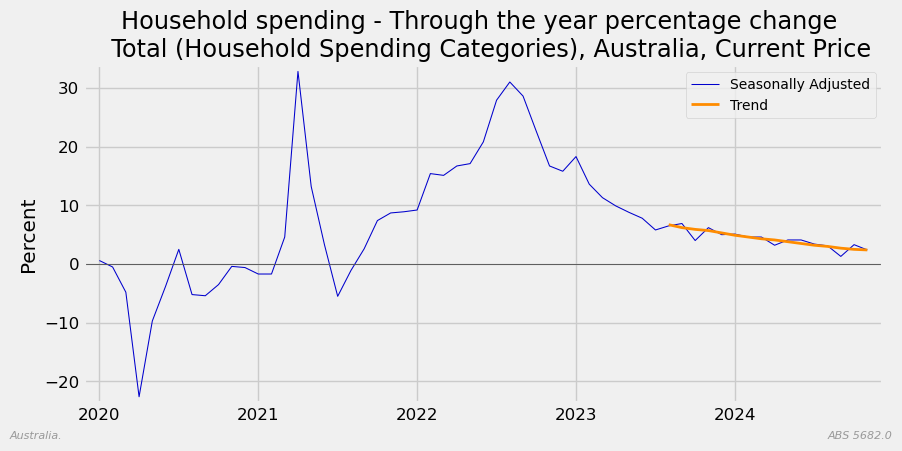

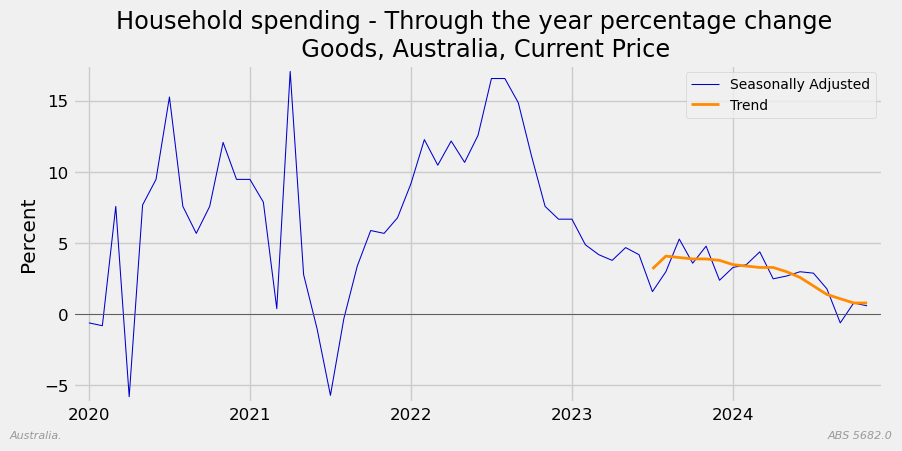

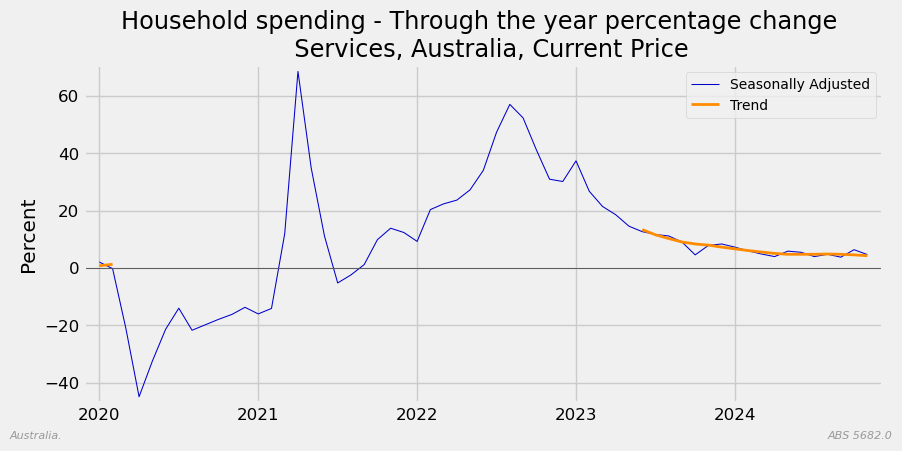

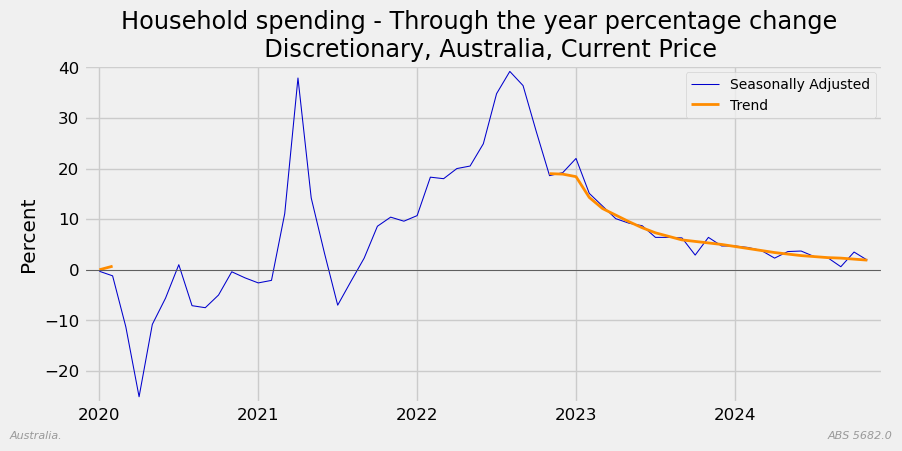

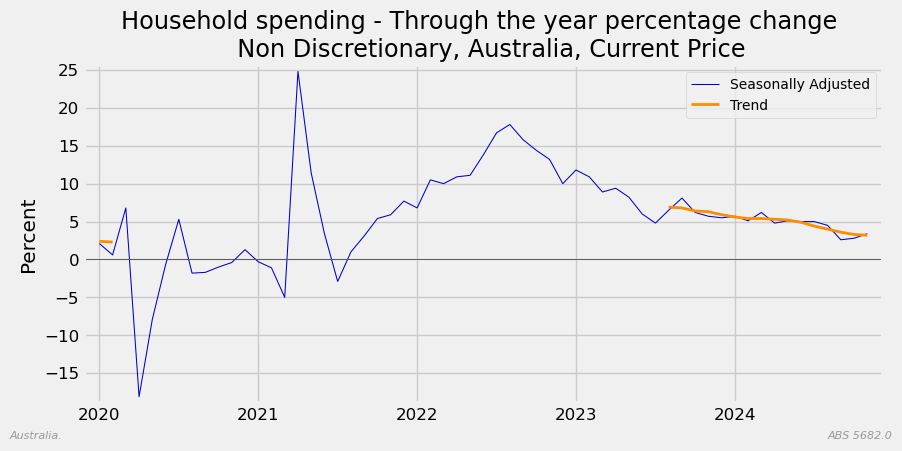

In [4]:
def headline_charts() -> None:
    """Produce headline charts."""

    wanted_tables = ["5682001"]

    for table in wanted_tables:
        if table not in abs_dict:
            print(f"Skipping {table} as it is not in the data")
            continue

        dids = meta.loc[
            (meta[mc.table] == table)
            & (meta[mc.did].str.contains("Household spending"))
            # & (~meta[mc.did].str.contains("ercent"))
            & (meta[mc.stype] == "Seasonally Adjusted"),
            mc.did,
        ].unique()
        for did in dids:
            select = {
                table: mc.table,
                did: mc.did,
                "Seasonally Adjusted": mc.stype,
            }
            _, seas_adj_id, units = ra.find_abs_id(meta, select, verbose=False)
            del select["Seasonally Adjusted"]
            select["Trend"] = mc.stype
            _, trend_id, units = ra.find_abs_id(meta, select, verbose=False)
            frame = pd.DataFrame()
            frame["Seasonally Adjusted"] = abs_dict[table][seas_adj_id]
            frame["Trend"] = abs_dict[table][trend_id]
            if "ercent" not in did:
                frame, units = ra.recalibrate(frame, units)
            elif "previous period" in did:
                # the COVID shock drowns out everything else
                frame = frame.loc[frame.index >= "2023"]
            title = "\n".join(did.split(";", 1))
            seas_trend_plot(
                frame,
                title=(title.replace(" ; ", ",").replace(" ;", "")),
                ylabel=units,
                y0=True,
                lfooter="Australia. ",
                rfooter="ABS 5682.0",
                show=SHOW,
                dropna=False,  # Trend is missing data
            )


headline_charts()

## Finished

In [ ]:
# watermark
%load_ext watermark
%watermark --python --conda --machine --iversion --watermark

In [ ]:
print("Done")